In [1]:
# Import the onnxruntime_genai module and alias it as og
# This module is used for running ONNX models with generative AI capabilities
import onnxruntime_genai as og


In [2]:
# Define the path to the model file
# This path points to a specific ONNX model file stored in a directory
model_path = '../../Models/Phi-3-vision-128k-instruct-onnx-cpu/cpu-int4-rtn-block-32-acc-level-4'

# Define the path to the image file
# This path points to an image file that will be used for demonstration or testing
img_path = './imgs/demo.png'

In [3]:
# Create an instance of the Model class from the onnxruntime_genai module
# This instance is initialized with the path to the model file
model = og.Model(model_path)

# Create a multimodal processor using the model instance
# This processor will handle different types of input data (e.g., text, images)
processor = model.create_multimodal_processor()

# Create a stream for tokenizing input data using the processor
# This stream will be used to process and tokenize the input data for the model
tokenizer_stream = processor.create_stream()


In [4]:
# Define a string variable containing the text prompt
# This prompt instructs to create Python code for an image and save it using matplotlib (plt)
text = "Please create Python code for image, and use plt to save the new picture under imgs/ and name it phi-3-vision.jpg."

In [5]:
# Initialize a string variable for the prompt with a user tag
prompt = "<|user|>\n"

# Append an image tag to the prompt
prompt += "<|image_1|>\n"

# Append the text prompt to the prompt string, followed by an end tag
prompt += f"{text}<|end|>\n"

# Append an assistant tag to the prompt, indicating the start of the assistant's response
prompt += "<|assistant|>\n"

In [6]:
# Open the image file using the Images class from the onnxruntime_genai module
# The img_path variable contains the path to the image file
image = og.Images.open(img_path)

In [7]:
# Process the prompt and the image using the multimodal processor
# The processor function takes the prompt and the image as inputs
# The result is stored in the inputs variable, which will be used for further processing or model inference
inputs = processor(prompt, images=image)

In [8]:
# Create an instance of the GeneratorParams class from the onnxruntime_genai module
# This instance is initialized with the model object
params = og.GeneratorParams(model)

# Set the inputs for the generator parameters using the processed inputs
params.set_inputs(inputs)

# Set the search options for the generator parameters
# The max_length parameter specifies the maximum length of the generated output
params.set_search_options(max_length=3072)

In [9]:
# Create an instance of the Generator class from the onnxruntime_genai module
# This instance is initialized with the model and the generator parameters
generator = og.Generator(model, params)

In [10]:
# Initialize an empty string variable to store the generated code
code = ''

In [11]:
# Loop until the generator has finished generating tokens
while not generator.is_done():
    # Compute the logits (probabilities) for the next token
    generator.compute_logits()
    
    # Generate the next token based on the computed logits
    generator.generate_next_token()

    # Retrieve the newly generated token
    new_token = generator.get_next_tokens()[0]
    
    # Decode the new token and append it to the code string
    code += tokenizer_stream.decode(new_token)
    
    # Print the decoded token to the console without a newline, and flush the output buffer
    print(tokenizer_stream.decode(new_token), end='', flush=True)
        

```python

import matplotlib.pyplot as plt


# Data to plot

labels = 'physics', 'chemistry', 'english', 'maths'
sizes = [28.6, 20.6, 15.9, 34.9]
colors = ['red', 'yellow', 'cyan', 'magenta']

# Plot

fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)

plt.title('Marks obtained in an exam')

plt.savefig('imgs/phi-3-vision.jpg', format='jpg')

```



The image is a pie chart representing the distribution of marks obtained in an exam across four subjects: physics, chemistry, English, and mathematics. The chart is divided into four colored segments, each corresponding to a subject. The size of each segment represents the proportion of marks obtained in that subject relative to the total marks obtained in all subjects.


The largest segment is purple, representing mathematics, which accounts for 34.9% of the total marks. The red segment represents physics, with 28.6% of the total marks. The yellow segment, which is for chemistry, acc

In [12]:
# The variable 'code' contains the generated code as a string
code


'```python\n\nimport matplotlib.pyplot as plt\n\n\n# Data to plot\n\nlabels = \'physics\', \'chemistry\', \'english\', \'maths\'\nsizes = [28.6, 20.6, 15.9, 34.9]\ncolors = [\'red\', \'yellow\', \'cyan\', \'magenta\']\n\n# Plot\n\nfig1, ax1 = plt.subplots()\n\nax1.pie(sizes, labels=labels, autopct=\'%1.1f%%\', startangle=140, colors=colors)\n\nplt.title(\'Marks obtained in an exam\')\n\nplt.savefig(\'imgs/phi-3-vision.jpg\', format=\'jpg\')\n\n```\n\n\n\nThe image is a pie chart representing the distribution of marks obtained in an exam across four subjects: physics, chemistry, English, and mathematics. The chart is divided into four colored segments, each corresponding to a subject. The size of each segment represents the proportion of marks obtained in that subject relative to the total marks obtained in all subjects.\n\n\nThe largest segment is purple, representing mathematics, which accounts for 34.9% of the total marks. The red segment represents physics, with 28.6% of the total m

In [13]:
# Find the starting index of the Python code block within the generated code
# The index function locates the substring '```python' and adds 9 to skip past it
begin = code.index('```python') + 9

# Slice the code string from the calculated starting index to the end
# This removes the initial part of the string up to and including '```python'
code = code[begin:]


In [14]:
# Find the ending index of the Python code block within the generated code
# The index function locates the substring '```' which marks the end of the code block
end = code.index('```')


In [15]:
# Slice the code string to include only the part up to the ending index
# This removes the trailing part of the string after the end of the code block
code = code[:end]


In [16]:
# The variable 'code' contains the generated code as a string
code


"\n\nimport matplotlib.pyplot as plt\n\n\n# Data to plot\n\nlabels = 'physics', 'chemistry', 'english', 'maths'\nsizes = [28.6, 20.6, 15.9, 34.9]\ncolors = ['red', 'yellow', 'cyan', 'magenta']\n\n# Plot\n\nfig1, ax1 = plt.subplots()\n\nax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)\n\nplt.title('Marks obtained in an exam')\n\nplt.savefig('imgs/phi-3-vision.jpg', format='jpg')\n\n"

In [17]:
# Import the subprocess module
# This module allows you to spawn new processes, connect to their input/output/error pipes, and obtain their return codes
import subprocess

In [18]:
# Run the generated Python code as a subprocess
# The subprocess.run function executes the command specified in the list
# The command runs the Python interpreter with the '-c' option to execute the code string
# The capture_output parameter is set to True to capture the standard output and error streams
result = subprocess.run(["python", "-c", code], capture_output=True)


In [19]:
# Import the Image and display functions from the IPython.display module
# The Image function is used to display an image given its file path or URL
# The display function is used to display the image in the output cell of a Jupyter notebook
from IPython.display import Image, display

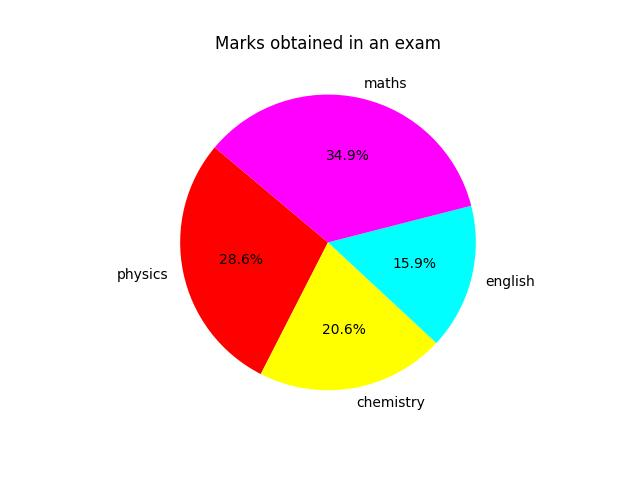

In [20]:
# Display an image in a Jupyter notebook cell
# The Image function creates an image object from a file
# The filename parameter specifies the path to the image file
display(
    Image(filename='./imgs/phi-3-vision.jpg')
)


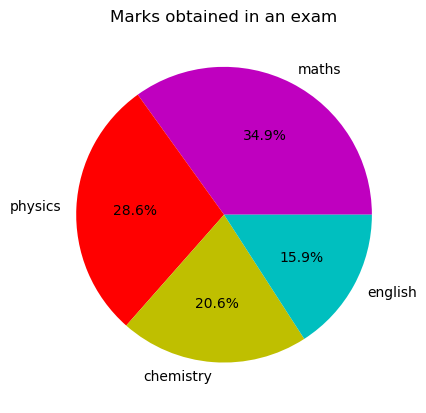

In [23]:
# Display an image in a Jupyter notebook cell
# The Image function creates an image object from a file
# The filename parameter specifies the path to the image file
display(
    Image(filename='./imgs/demo.png'))